In [1]:
#outliers

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#define of dataset
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,12,10,14,13,15,10]

In [9]:
#z score
outliers = []
def detect_outliers(data):
  threshold = 3 ##this defines the 3rd standard deviation, beacause 3rd standard deviation it is outlier
  mean = np.mean(dataset)
  std = np.std(data)

  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers


In [10]:
detect_outliers(dataset)

[107, 108]

(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <a list of 10 Patch objects>)

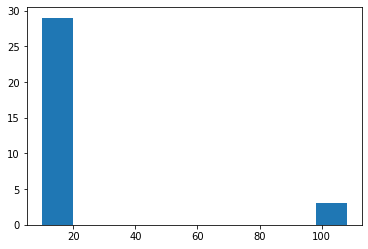

In [15]:
plt.hist(dataset)

{'boxes': [<matplotlib.lines.Line2D at 0x7f0c5eac1410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0c5ea493d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0c5ea4e410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0c5ea49e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0c5eac1910>,
  <matplotlib.lines.Line2D at 0x7f0c5eac1e50>]}

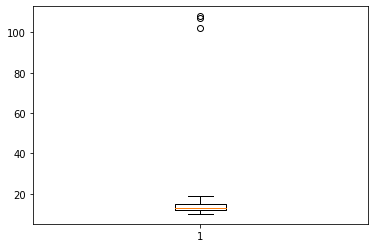

In [13]:
plt.boxplot(dataset)

#IQR
#for inter-quartile range we need 75 percentile and 25 percentile
#1 step is sort the data
#2 calculate Q1 and Q3
#3then we need to find out IQR = (Q1-Q3)
#4 find the lower fence = (Q1-1.5(IQR))
#5 find the higher fence = (Q3+1.5(IQR))

In [17]:
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [18]:
q1,q3 = np.percentile(dataset, [25,75])


In [19]:
print(q1)
print(q3)

12.0
15.0


In [22]:
iqr = q1-q3

In [27]:
#find the lower fence
lower_fence = q1-1.5*(iqr)
higher_fence = q3+1.5*(iqr)
print(lower_fence, higher_fence)

16.5 10.5


In [28]:
for i in dataset:
  if i < lower_fence or i > higher_fence:
    outliers.append(i)

In [30]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


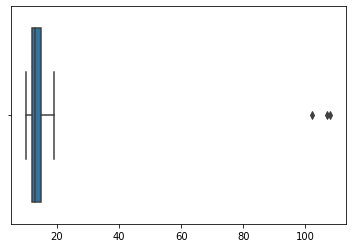

In [32]:
sns.boxplot(dataset)
#you can see the outlier in it